In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.image as mpimg
import numpy as np
import pickle
import tensorflow as tf
from tqdm import tqdm
from __future__ import division
import matplotlib.pyplot as plt


In [2]:
filename = 'CIFAR_2888_epoch_300_v1.pkl'
with open('CIFAR/savedata/'+filename, 'rb') as f:
    dd2888 = pickle.load(f)
    
filename = 'CIFAR_2888_epoch_300_v2.pkl'
with open('CIFAR/savedata/'+filename, 'rb') as f:
    dd2888v2 = pickle.load(f)    

filename = 'CIFAR_2888_epoch_300_v3.pkl'
with open('CIFAR/savedata/'+filename, 'rb') as f:
    dd2888v3 = pickle.load(f)        
    
filename = 'CIFAR_28ff_epoch_300.pkl'
with open('CIFAR/savedata/'+filename, 'rb') as f:
    dd28ff = pickle.load(f)    
    
filename = 'CIFAR_28ff_epoch_300_lr_x2.pkl'
with open('CIFAR/savedata/'+filename, 'rb') as f:
    dd28ff2 = pickle.load(f)    
    
filename = 'CIFAR_ffff_epoch_300.pkl'
with open('CIFAR/savedata/'+filename, 'rb') as f:
    dd4f = pickle.load(f)  
    
########################################################################
########################################################################

filename = 'CIFAR_2888_gamma_8_epoch_300.pkl'
with open('CIFAR/savedata/'+filename, 'rb') as f:
    dd2888_g_8 = pickle.load(f) 


filename = 'CIFAR_2888_kg_2_epoch_300_v2.pkl'
with open('CIFAR/savedata/'+filename, 'rb') as f:
    dd2888_kg_2 = pickle.load(f)     
    
filename = 'CIFAR_2888_kg_12_epoch_300_v2.pkl'
with open('CIFAR/savedata/'+filename, 'rb') as f:
    dd2888_kg_12 = pickle.load(f)         


In [3]:
loss2888 = dd2888['lossTotal']
errorTotal2888 = dd2888['errorTotal']
errorTest2888 = dd2888['errorTest']

loss2888v2 = dd2888v2['lossTotal']
errorTotal2888v2 = dd2888v2['errorTotal']
errorTest2888v2 = dd2888v2['errorTest']

errorTest2888v3 = dd2888v3['errorTest']

loss28ff = dd28ff['lossTotal']
errorTotal28ff = dd28ff['errorTotal']
errorTest28ff = dd28ff['errorTest']

loss28ff2 = dd28ff2['lossTotal']
errorTotal28ff2 = dd28ff2['errorTotal']
errorTest28ff2 = dd28ff2['errorTest']

loss4f = dd4f['lossTotal']
errorTotal4f = dd4f['errorTotal']
errorTest4f = dd4f['errorTest']

########################################################################
########################################################################

loss2888_g_8 = dd2888_g_8['lossTotal']
errorTotal2888_g_8 = dd2888_g_8['errorTotal']
errorTest2888_g_8 = dd2888_g_8['errorTest']

loss2888_kg_2 = dd2888_kg_2['lossTotal']
errorTotal2888_kg_2 = dd2888_kg_2['errorTotal']
errorTest2888_kg_2 = dd2888_kg_2['errorTest']

loss2888_kg_12 = dd2888_kg_12['lossTotal']
errorTotal2888_kg_12 = dd2888_kg_12['errorTotal']
errorTest2888_kg_12 = dd2888_kg_12['errorTest']

In [4]:
print('Error test')
print('----------')

print('ffff: {:.2f}%'.format(100*np.min(np.array(errorTest4f))))
print('2888: {:.2f}%'.format(100*np.min(np.array(errorTest2888))))
print('28ff: {:.2f}%'.format(100*np.min(np.array(errorTest28ff))))
print('28ff-2: {:.2f}%'.format(100*np.min(np.array(errorTest28ff2))))
# print('2888-3: {:.2f}%'.format(100*np.min(np.array(errorTest2888v3))))
# print('2888-3: {:.2f}%'.format(100*np.min(np.array(errorTest2888v3))))
print()
print('2888 - gamma = 8: {:.2f}%'.format(100*np.min(np.array(errorTest2888_g_8))))
print('28-2-8 - kg = 2: {:.2f}%'.format(100*np.min(np.array(errorTest2888_kg_2))))
print('28-12-8 - kg = 12: {:.2f}%'.format(100*np.min(np.array(errorTest2888_kg_12))))


Error test
----------
ffff: 5.81%
2888: 6.94%
28ff: 9.07%
28ff-2: 8.32%

2888 - gamma = 8: 16.29%
28-2-8 - kg = 2: 54.51%
28-12-8 - kg = 12: 6.64%


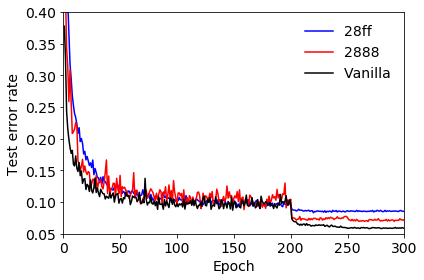

In [5]:
fig, (ax1) = plt.subplots(1,figsize=(6,4))

ax1.plot(1+np.arange(len(errorTest28ff2)), errorTest28ff2, 'b-')
# ax1.plot(1+np.arange(len(errorTest28ff)), errorTest28ff, 'b-')
ax1.plot(1+np.arange(len(errorTest2888)), errorTest2888, 'r-')
ax1.plot(1+np.arange(len(errorTest4f)), errorTest4f, 'k-')


ax1.set_ylabel('Test error rate',fontsize=14)
ax1.set_xlabel('Epoch',fontsize=14)
ax1.set_xlim((0,300))
ax1.set_ylim((0.05,0.4))

legend = ax1.legend(['28ff','2888', 'Vanilla'],fontsize=14,frameon=False)
for ax in [ax1]:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)

plt.tight_layout()

plt.show()

fig.savefig('CIFAR/figures/fig2.pdf') #, bbox_inches='tight'


In [6]:
filename = 'CIFAR_2888_epoch_100.pkl'
with open('CIFAR/savedata/'+filename, 'rb') as f:
    dd2888_grads = pickle.load(f) 

gradH2888 = dd2888_grads['gradH']


filename = 'CIFAR_4f_epoch_100.pkl'
with open('CIFAR/savedata/'+filename, 'rb') as f:
    dd4f_grads = pickle.load(f) 

gradH4f = dd4f_grads['gradH']

In [7]:
print(dd2888_grads.keys())
print(len(dd2888_grads['gradH']))
print(len(dd2888_grads['gradW']))
print(len(dd2888_grads['gradWq']))

dict_keys(['lossTotal', 'errorTotal', 'errorTest', 'gradH', 'gradW', 'gradWq'])
29
8
8


In [8]:
gradH4f[10].shape

(128, 512, 8, 8)

In [9]:
len(gradH2888)

29

In [10]:
gradH4f[14].shape

(128, 512, 4, 4)

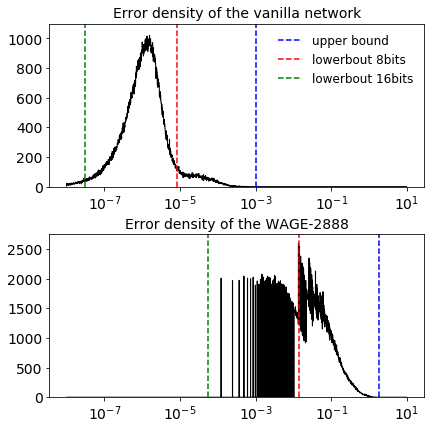

In [11]:
# gradH2888_line = gradH2888[17].reshape(128 * 512 * 8 * 8)
gradH2888_line = gradH2888[22].reshape(128 * 512 * 4 * 4)
# gradH4f_line = gradH4f[11].reshape(128 * 512 * 8 * 8)
gradH4f_line = gradH4f[14].reshape(128 * 512 * 4 * 4)

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6,6))
bins = (10**(-np.linspace(-1, 8., 2000)))[::-1]
ax1.set_title('Error density of the vanilla network')
ax1.set_xscale('log')
ax1.hist(gradH4f_line, bins=bins, histtype='step', fill=False, color = 'k') 
ax1.semilogx([0.001, 0.001], [0, 1100], '--b')
ax1.semilogx([8.13e-6, 8.13e-6], [0, 1100], '--r')
ax1.semilogx([3.15e-8, 3.15e-8], [0, 1100], '--g')
ax1.legend(('upper bound', 'lowerbout 8bits', 'lowerbout 16bits'), fontsize=12, frameon=False)
bins = (10**(-np.linspace(-1, 8., 2000)))[::-1]
ax1.set_ylim(0, 1100)
ax2.set_title('Error density of the WAGE-2888')
ax2.set_xscale('log')
ax2.hist(gradH2888_line, bins=bins, histtype='step', fill=False, color = 'k') 
ax2.semilogx([1.85, 1.85], [0, 2750], '--b')
ax2.semilogx([0.014, 0.014], [0, 2750], '--r')
ax2.semilogx([5.41e-5, 5.41e-5], [0, 2750], '--g')
plt.tight_layout()

ax2.set_ylim(0, 2750)
for ax in [ax1, ax2]:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)

plt.show()

fig.savefig('CIFAR/figures/fig3.pdf') #, bbox_inches='tight'



In [12]:
filename = 'CIFAR_2888_epoch_20_v16_LastFigure.pkl'
with open('CIFAR/savedata/'+filename, 'rb') as f:
    data = pickle.load(f)
# len(data['gradW_q'])
# data['gradW_q'][0][0].shape
len(data['gradH'])

29

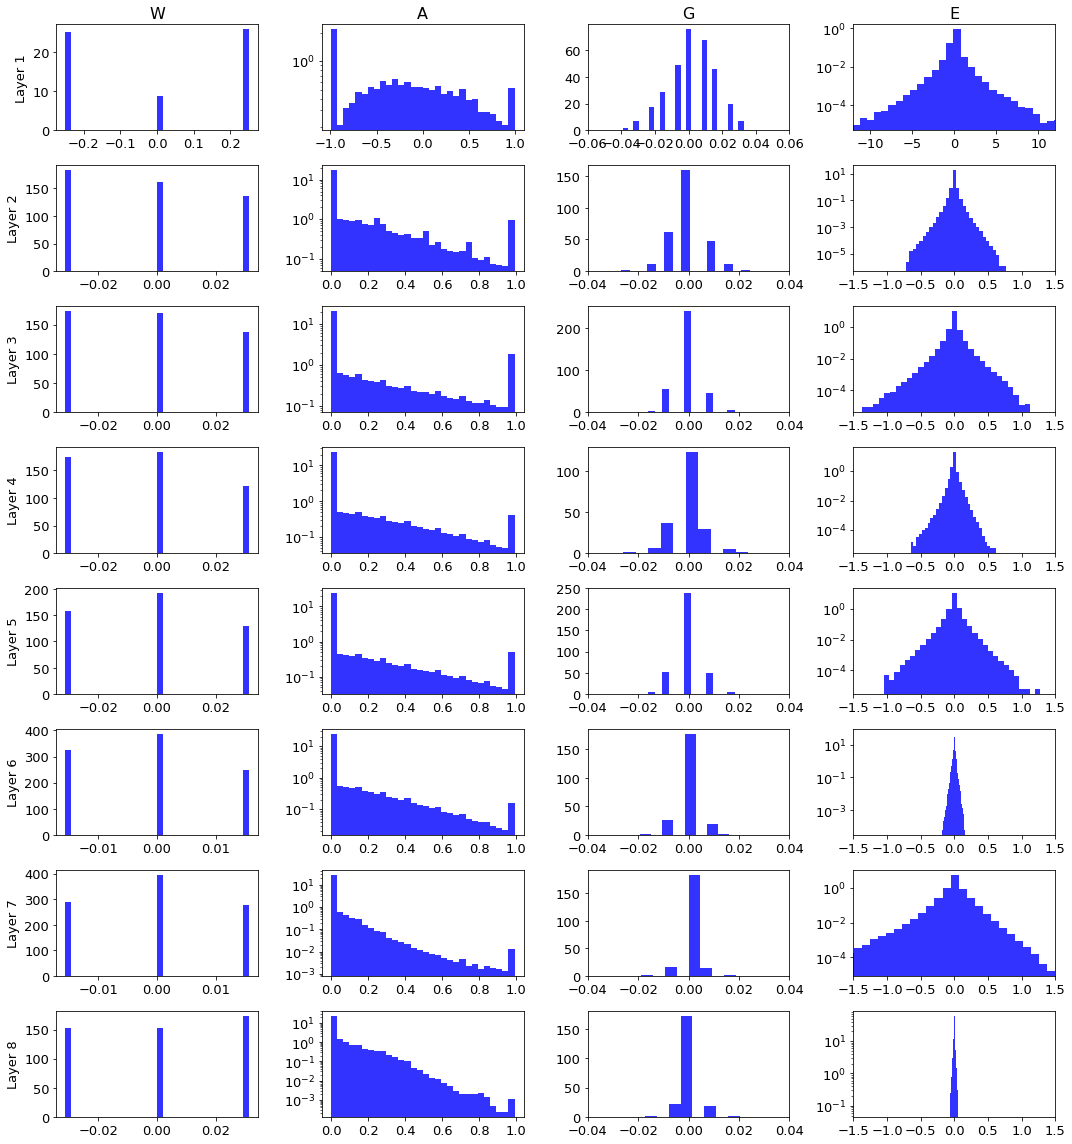

In [13]:
fig, ax = plt.subplots(8,4,figsize=(15,16))

for i in range(8):
    ind = np.prod(data['W_q'][i].shape)
    xx = data['W_q'][i].reshape(ind)
    n, bins, patches = ax[i, 0].hist(xx, bins=30, normed=1, facecolor='blue', alpha=0.8)
    ax[i, 0].set_ylabel('Layer {}'.format(i+1))
    ax[i, 2].set_xlim((-0.03, 0.03))    
    
for i in range(8):
    k = [1, 4, 8, 11, 15, 18, 22, 26]
    ind = np.prod(data['H'][k[i]].shape)
    xx = data['H'][k[i]].reshape(ind)
    n, bins, patches = ax[i, 1].hist(xx, bins=30, normed=1, facecolor='blue', alpha=0.8)
    ax[i, 1].set_yscale('log', nonposy='clip')    
    
for i in range(8):
    ind = np.prod(data['gradW_q'][i][0].shape)
    xx = data['gradW_q'][i][0].reshape(ind)
    n, bins, patches = ax[i, 2].hist(xx, bins=30, normed=1,facecolor='blue', alpha=0.8)
    ax[i, 2].set_xlim((-0.04, 0.04))
    
ax[0, 2].set_xlim((-0.06, 0.06))    
for i in range(8):
#     k = [3, 7, 10, 14, 17, 21, 25, 28]
    k = [0, 3, 7, 10, 14, 17, 21, 26]
    ind = np.prod(data['gradH'][k[i]].shape)
    xx = data['gradH'][k[i]].reshape(ind)
    n, bins, patches = ax[i, 3].hist(xx, bins=30, normed=1, facecolor='blue', alpha=0.8)
    ax[i, 3].set_yscale('log', nonposy='clip')   
    ax[i, 3].set_xlim((-1.5, 1.5))        


ax[0, 3].set_xlim((-12, 12))
    
for i in range(8):
    for j in range(4):  
        for item in ([ax[i, j].xaxis.label, ax[i, j].yaxis.label] + ax[i, j].get_xticklabels() + ax[i, j].get_yticklabels()):
            item.set_fontsize(13)
            

str = ['W', 'A', 'G', 'E']
for i in range(4):
    ax[0, i].set_title(str[i], fontsize=16)

plt.tight_layout()
plt.show()

fig.savefig('CIFAR/figures/Fig5.pdf')


## MNIST, CIFAR and SVHN

In [14]:
dd = []
mins = []
for i in range(11):
    filename = 'MNIST_100epochs_v{}'.format(i)
    with open('MNIST/savedata/'+filename, 'rb') as f:
        dd.append(pickle.load(f))
    mins.append(np.min(dd[i]['errorTest']))
    
mnist_alldata = 100*np.array(mins)

dd = []
for i in [1, 2, 3, 4, 11, 15, 7, 10, 11, 12]:
    filename = 'CIFAR_2888_epoch_300_v{}.pkl'.format(i)
    with open('CIFAR/savedata/'+filename, 'rb') as f:
        dd.append(pickle.load(f))

cifar_alldata = []
for i in range(10):
    cifar_alldata.append(100*np.min(dd[i]['errorTest']))

print('Mean test error rate')
print('====================')
print('MNIST {:.3f}%'.format(np.mean(mnist_alldata)))
print('CIFAR {:.3f}%'.format(np.mean(cifar_alldata)))

Mean test error rate
MNIST 0.512%
CIFAR 6.856%


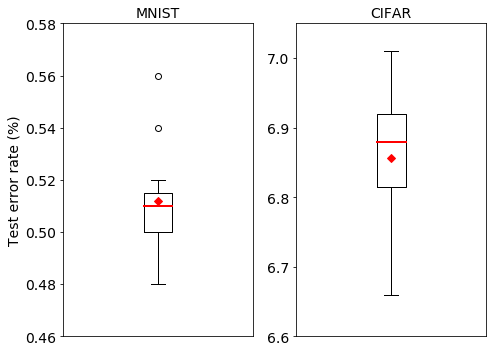

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)

data = []

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(7,5))
# medianprops = {'color': 'r', 'linewidth': 2}
# meanprops = {'marker':'o', 'markeredgecolor':'red',
#                       'markerfacecolor':'red'}
medianprops = dict(linestyle='-', linewidth=2, color='r')
meanprops = dict(marker='D', markeredgecolor='r',
                      markerfacecolor='r')
ax1.boxplot(mnist_alldata, 0, medianprops = medianprops, meanprops=meanprops, showmeans=True)
ax2.boxplot(cifar_alldata, 0, medianprops = medianprops, meanprops=meanprops, showmeans=True)
ax1.set_ylim((0.46, 0.58))
ax2.set_ylim((6.6, 7.05))
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)

ax1.set_title('MNIST')
ax2.set_title('CIFAR')
ax1.set_ylabel('Test error rate (%)')

for ax in [ax1, ax2]:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)

plt.tight_layout()        
plt.show()

fig.savefig('CIFAR/figures/CIFAR_MNIST_boxplot.pdf') #, bbox_inches='tight'



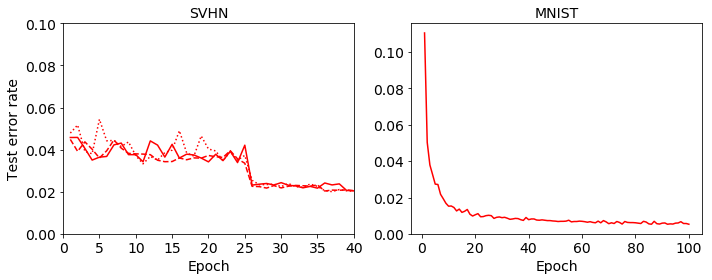

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))


filename = 'SVHN_2888_epoch_40_v11a.pkl'
with open('SVHN/savedata/'+filename, 'rb') as f:
    dd2888_svhn = pickle.load(f) 

error_test_dd2888_svhn1 = dd2888_svhn['errorTest']
# ax1.plot(1+np.arange(len(error_test_dd2888_svhn1)), error_test_dd2888_svhn1, '-k')

########################################

filename = 'SVHN_2888_Best.pkl'
with open('SVHN/savedata/'+filename, 'rb') as f:
    dd2888_svhn = pickle.load(f) 

error_test_dd2888_svhn2 = dd2888_svhn['errorTest']
ax1.plot(1+np.arange(len(error_test_dd2888_svhn2)), error_test_dd2888_svhn2, '-r')

########################################

filename = 'SVHN_2888_epoch_40_extra_data_v0.pkl'
with open('SVHN/savedata/'+filename, 'rb') as f:
    dd2888_svhn = pickle.load(f) 

error_test_dd2888_svhn3 = dd2888_svhn['errorTest']
ax1.plot(1+np.arange(len(error_test_dd2888_svhn3)), error_test_dd2888_svhn3, '--r')

filename = 'SVHN_2888_epoch_40_extra_data_v1.pkl'
with open('SVHN/savedata/'+filename, 'rb') as f:
    dd2888_svhn = pickle.load(f) 

error_test_dd2888_svhn4 = dd2888_svhn['errorTest']
ax1.plot(1+np.arange(len(error_test_dd2888_svhn4)), error_test_dd2888_svhn4, ':r')


ax1.set_title('SVHN')

ax1.set_ylabel('Test error rate',fontsize=14)
ax1.set_xlabel('Epoch',fontsize=14)
ax1.set_xlim((0,40))
ax1.set_ylim((0,0.1))


filename = 'MNIST_100epochs_v0'
with open('MNIST/savedata/'+filename, 'rb') as f:
    dd = pickle.load(f)
    
error_test_dd2888_mnist = dd['errorTest']

ax2.plot(1+np.arange(len(error_test_dd2888_mnist)), error_test_dd2888_mnist, '-r')

ax2.set_xlabel('Epoch',fontsize=14)
ax2.set_title('MNIST')


        
        
for ax in [ax1, ax2]:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)

plt.tight_layout()

plt.show()

fig.savefig('SVHN/figures/SVHN.pdf') #, bbox_inches='tight'

# legend = ax1.legend(['LR =[0, 8, 30, 1, 38, 1/8, 40, 0]'])


In [17]:
mins_svhn = [np.min(error_test_dd2888_svhn2), np.min(error_test_dd2888_svhn3), np.min(error_test_dd2888_svhn4)]
print('SVHN optimal accuracy: {:.2f}%'.format(100*np.min(mins_svhn)))

SVHN optimal accuracy: 1.98%
